In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
# 使用 WEEKDAY_APPR_PROCESS_START 欄位資料進行分析
day_data = pd.DataFrame(app_train['WEEKDAY_APPR_PROCESS_START'])
incon_data = pd.DataFrame(app_train['AMT_INCOME_TOTAL'])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


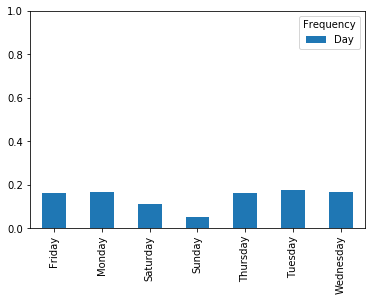

In [4]:
# 統計日期分佈
day_data_one_hot = pd.get_dummies(day_data)
day_data_dis = day_data_one_hot.sum() / day_data_one_hot.shape[0]
plt_day_data = []
for i in day_data_dis:
    plt_day_data.append(i)

# 使用 Pandas 畫圖
dfplt = pd.DataFrame(plt_day_data, index=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], columns=pd.Index(['Day'], name="Frequency"))
dfplt.plot(kind = "bar", ylim = [0, 1])

In [5]:
# 採用 AMT_INCOME_TOTAL 進行分析
print(f"Mean of AMT_INCOME_TOTAL: {incon_data.describe().iloc[1, 0]}")
print(f"STD of AMT_INCOME_TOTAL: {incon_data.describe().iloc[2, 0]}")
print(incon_data.describe())

Mean of AMT_INCOME_TOTAL: 168797.9192969845
STD of AMT_INCOME_TOTAL: 237123.14627883647
       AMT_INCOME_TOTAL
count      3.075110e+05
mean       1.687979e+05
std        2.371231e+05
min        2.565000e+04
25%        1.125000e+05
50%        1.471500e+05
75%        2.025000e+05
max        1.170000e+08


([<matplotlib.axis.XTick at 0x7f27f02c9240>,
 <a list of 6 Text xticklabel objects>)

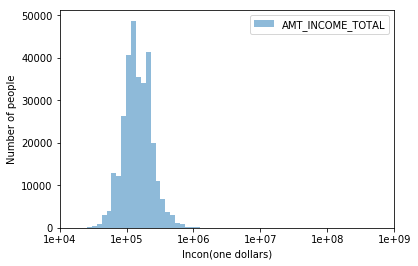

In [6]:
# 用 Hist 畫圖
incon_data_log = np.log10(incon_data)
incon_data_log.plot(kind = "hist", bins = 50, alpha = 0.5)
x_min = int(np.floor(incon_data_log.min()))
x_max = int(np.ceil(incon_data_log.max()))
plt.xlim(x_min, x_max)
plt.xlabel('Incon(one dollars)')
plt.ylabel('Number of people')
plt.xticks(np.arange(x_min, x_max + 1), [f'{10**i:.0e}' for i in range(x_min, x_max + 1)])

([<matplotlib.axis.XTick at 0x7f27f01aec88>,
 <a list of 6 Text xticklabel objects>)

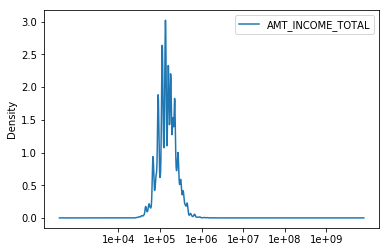

In [7]:
# 畫出 KDE 的圖
incon_data_log10_kde = np.log10(incon_data)
incon_data_log10_kde.plot(kind = "kde")
x_min = int(np.floor(incon_data_log10_kde.min()))
x_max = int(np.ceil(incon_data_log10_kde.max()))
plt.xticks(np.arange(x_min, x_max + 1), [f'{10**i:.0e}' for i in range(x_min, x_max + 1)])